# Data Clean up

Haytham Mohamed - INFS890 Spring 2020

This notebook is to clean orders flow data

In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from scipy import stats

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.3f}'.format

# Read the raw data. 

All data is in one file, where each metric is listed under each other with three columns: 

1- metric: The name of the metric

2- date: the data and time of the metric

3- value: the metric value


In [375]:
# 1- read processed file

home_dir = '/Users/hmohamed/github/data-research-spring2020/sock-shop'

file_dir = home_dir + '/processed-data/'
input_file = 'orders_flow_data.csv'

save=True

In [376]:
def read_df(file_dir, data_file):
    df = pd.read_csv(file_dir + data_file)
    return to_time_series(df)

def to_time_series(df, index_col_name='date'):
    df[index_col_name] = pd.to_datetime(df[index_col_name])
    df.set_index(index_col_name, inplace=True)
    df.sort_index(inplace=True)
    return df
    

In [377]:
orders_flow_df = read_df(file_dir, input_file)
orders_flow_df.head(5) 

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,...,orders-db_pods,user_pods,user-db_pods,shipping_pods,payment_pods,carts_pods,carts-db_pods,nodes_cpu_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,,,,
2020-03-26 19:46:22,0.030,0.010,0.010,0.010,0.010,0.010,0.010,0.030,0.070,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.500,0.150,0.240
2020-03-26 19:46:37,0.060,0.020,0.020,0.020,0.020,0.010,0.010,0.180,0.180,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.890,0.150,0.240
2020-03-26 19:46:52,0.070,0.030,0.020,0.030,0.020,0.010,0.010,0.440,0.200,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.350,0.150,0.240
2020-03-26 19:47:07,0.070,0.030,0.020,0.020,0.020,0.010,0.010,0.230,0.170,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.260,0.130,0.240
2020-03-26 19:47:22,0.070,0.020,0.010,0.020,0.020,0.010,0.010,0.240,0.140,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.280,0.360,0.240


In [378]:
orders_flow_df.shape


(6766, 21)

Take away records with ltcy or number of pods null or equals to zero

In [379]:
orders_flow_df = orders_flow_df[orders_flow_df['orders_ltcy'].notna()]
orders_flow_df.shape

(6766, 21)

In [380]:
orders_flow_df = orders_flow_df[orders_flow_df['orders_ltcy'] >= 0]
orders_flow_df.shape

(6766, 21)

In [381]:
orders_flow_df.describe(include="all")

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,...,orders-db_pods,user_pods,user-db_pods,shipping_pods,payment_pods,carts_pods,carts-db_pods,nodes_cpu_use,orders_req,orders_ltcy
count,"6,766.000","6,766.000","6,766.000","6,766.000","6,766.000","6,766.000","6,766.000","6,766.000","6,766.000","6,766.000",...,"6,766.000","6,766.000","6,766.000","6,766.000","6,766.000","6,766.000","6,766.000","6,766.000","6,766.000","6,766.000"
mean,0.827,0.212,0.020,0.199,0.119,0.052,0.032,0.531,1.828,2.757,...,1.000,2.761,1.000,2.761,2.761,2.761,1.000,4.104,5.033,2.973
std,0.617,0.132,0.005,0.135,0.080,0.044,0.012,0.576,1.990,1.098,...,0.000,1.092,0.000,1.092,1.092,1.092,0.000,2.083,4.201,3.514
min,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.030,0.010,0.500,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.100,0.000,0.020
25%,0.190,0.080,0.020,0.050,0.030,0.040,0.020,0.120,0.020,2.000,...,1.000,2.000,1.000,2.000,2.000,2.000,1.000,1.920,0.490,0.240
50%,0.840,0.220,0.020,0.200,0.120,0.050,0.030,0.320,1.155,3.000,...,1.000,3.000,1.000,3.000,3.000,3.000,1.000,4.210,5.145,0.490
75%,1.290,0.300,0.020,0.300,0.180,0.060,0.040,0.580,3.280,4.000,...,1.000,4.000,1.000,4.000,4.000,4.000,1.000,5.780,8.195,5.809
max,2.730,0.910,0.040,0.640,0.340,0.630,0.100,2.530,6.580,4.000,...,1.000,4.000,1.000,4.000,4.000,4.000,1.000,9.660,20.130,9.750


# Check missing values

In [382]:
# percent of missing value for every feature
orders_flow_df.isnull().sum() * 100 / orders_flow_df.shape[0]

front-end_cpu_use   0.000
orders_cpu_use      0.000
orders-db_cpu_use   0.000
user_cpu_use        0.000
user-db_cpu_use     0.000
                     ... 
carts_pods          0.000
carts-db_pods       0.000
nodes_cpu_use       0.000
orders_req          0.000
orders_ltcy         0.000
Length: 21, dtype: float64

# Check Outliers

### latency target 

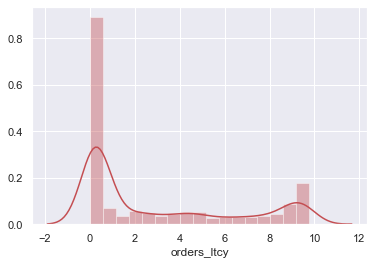

In [383]:
sns.distplot(orders_flow_df['orders_ltcy'], hist=True, rug=False, color="r", label='ltcy')

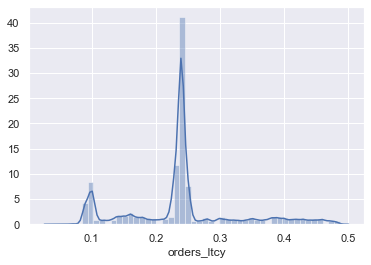

In [384]:
# taking percentile out (between lower and upper limit)
# looks like first half of latency is between 0.24 and 1.361, the other half is 2 and up to 9.7
# acceptable outliers in services latency, I'll consider it. so take all data (0 to 100%)
# i.e. not to trim any portion from either edges

# latency
df2 = orders_flow_df
if 1 == 1:
    minq = df2['orders_ltcy'].quantile(0)
    maxq = df2['orders_ltcy'].quantile(.5)
    df2 = df2[df2['orders_ltcy'] > minq]
    df2 = df2[df2['orders_ltcy'] < maxq]
    sns.distplot(df2['orders_ltcy'])
    
# request rate
if 1 == 1:
    minq = df2['orders_req'].quantile(0)
    maxq = df2['orders_req'].quantile(0.8)
    df2 = df2[df2['orders_req'] > minq]
    df2 = df2[df2['orders_req'] < maxq]
    #sns.distplot(df2['orders_req'])

The scaled latency distribution shows now an exponential graph. Taking the log and plotting it would remedy the skewness.

In [385]:
df2.shape

(2567, 21)

In [386]:
df2.describe(include="all")

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,...,orders-db_pods,user_pods,user-db_pods,shipping_pods,payment_pods,carts_pods,carts-db_pods,nodes_cpu_use,orders_req,orders_ltcy
count,"2,567.000","2,567.000","2,567.000","2,567.000","2,567.000","2,567.000","2,567.000","2,567.000","2,567.000","2,567.000",...,"2,567.000","2,567.000","2,567.000","2,567.000","2,567.000","2,567.000","2,567.000","2,567.000","2,567.000","2,567.000"
mean,0.709,0.189,0.019,0.171,0.102,0.046,0.026,0.350,1.513,2.205,...,1.000,2.207,1.000,2.207,2.207,2.207,1.000,3.785,4.043,0.241
std,0.362,0.090,0.004,0.097,0.058,0.032,0.012,0.300,1.231,0.989,...,0.000,0.987,0.000,0.987,0.987,0.987,0.000,1.348,2.326,0.083
min,0.030,0.010,0.010,0.010,0.010,0.010,0.010,0.030,0.010,0.500,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.100,0.020,0.040
25%,0.430,0.120,0.020,0.090,0.060,0.030,0.020,0.180,0.330,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.800,1.960,0.230
50%,0.710,0.180,0.020,0.160,0.090,0.050,0.020,0.250,1.380,2.000,...,1.000,2.000,1.000,2.000,2.000,2.000,1.000,3.770,4.090,0.240
75%,0.920,0.250,0.020,0.220,0.130,0.060,0.030,0.350,2.550,3.000,...,1.000,3.000,1.000,3.000,3.000,3.000,1.000,4.660,6.130,0.240
max,2.120,0.910,0.030,0.510,0.300,0.630,0.080,2.150,5.020,4.000,...,1.000,4.000,1.000,4.000,4.000,4.000,1.000,7.630,7.960,0.480


In [387]:
orders_flow_df = df2
if save:
    processed_file_path = file_dir + 'order_flow_cleanup_data.csv'
    orders_flow_df.to_csv(path_or_buf=processed_file_path, index=True)